In [1]:
#Libraries
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import pandas as pd
import glob
import os
import re
import pickle



In [2]:
# Specify the folder path where CSV files are stored
folder_path = 'data/'

# Use glob to find all CSV files in the specified folder
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Use a list comprehension to read each CSV file into a DataFrame and ensure 'Date' is string
df_list = []
for file in all_files:
    try:
        # Read each CSV and convert 'Date' to string format
        buli_df = pd.read_csv(file, encoding='ISO-8859-1', dtype={'Date': str})
        df_list.append(buli_df)
    except pd.errors.ParserError as e:
        print(f"ParserError parsing {file}: {e}")
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError in {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
buli_df = pd.concat(df_list, ignore_index=True)

# Standardize and parse the 'Date' column
buli_df['Date'] = buli_df['Date'].str.strip()  # Remove extra whitespace
buli_df['Date'] = buli_df['Date'].replace(r'[/-]', '-', regex=True)  # Replace separators with '-'

# Attempt to parse dates as `dayfirst` and handle both `dd/mm/yyyy` and `dd/mm/yy`
buli_df['Date'] = buli_df['Date'].apply(lambda x: re.sub(r'(\d{2}/\d{2}/)(\d{2})$', r'\120\2', x))
buli_df['Date'] = pd.to_datetime(buli_df['Date'], dayfirst=True, errors='coerce')

# Check for any remaining NaT values in 'Date' after parsing
missing_dates = buli_df[buli_df['Date'].isna()]
if not missing_dates.empty:
    print("Warning: Some dates could not be parsed after concatenation.")
    print(missing_dates)

# Display the combined DataFrame
print("Final combined DataFrame with parsed dates:")
buli_df

Final combined DataFrame with parsed dates:


/var/folders/72/b7zxktp96cz1n4tjk3mlbj5w0000gn/T/ipykernel_1872/1889391515.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  buli_df['Date'] = pd.to_datetime(buli_df['Date'], dayfirst=True, errors='coerce')


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,D1,2015-08-14,Bayern Munich,Hamburg,5,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D1,2015-08-15,Augsburg,Hertha,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1,2015-08-15,Darmstadt,Hannover,2,2,D,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D1,2015-08-15,Dortmund,M'gladbach,4,0,H,3,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D1,2015-08-15,Leverkusen,Hoffenheim,2,1,H,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,D1,2013-05-18,Hamburg,Leverkusen,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5504,D1,2013-05-18,Hannover,Fortuna Dusseldorf,3,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5505,D1,2013-05-18,M'gladbach,Bayern Munich,3,4,A,3,2,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5506,D1,2013-05-18,Nurnberg,Werder Bremen,3,2,H,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#formatting the date column to datetime format and sorting by date
#buli_df['Date'] = pd.to_datetime(buli_df['Date'])

buli_df = buli_df.sort_values(['Date']).reset_index(drop=True)
buli_df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,D1,2006-08-11,Bayern Munich,Dortmund,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D1,2006-08-12,Leverkusen,Aachen,3,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1,2006-08-12,Mainz,Bochum,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D1,2006-08-12,M'gladbach,Cottbus,2,0,H,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D1,2006-08-12,Schalke 04,Ein Frankfurt,1,1,D,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,D1,2024-05-18,Heidenheim,FC Koln,4,1,H,3,0,H,...,2.08,1.86,2.07,1.95,2.09,1.84,2.01,NaN,NaN,NaN
5504,D1,2024-05-18,Ein Frankfurt,RB Leipzig,2,2,D,0,1,A,...,2.00,1.93,1.96,2.40,2.00,2.05,1.84,NaN,NaN,NaN
5505,D1,2024-05-18,Dortmund,Darmstadt,4,0,H,2,0,H,...,2.00,1.87,2.02,1.88,2.11,1.85,2.01,NaN,NaN,NaN
5506,D1,2024-05-18,Hoffenheim,Bayern Munich,4,2,H,1,2,A,...,1.90,2.01,1.90,2.04,1.94,1.95,1.90,NaN,NaN,NaN


In [4]:
#checking for null values
buli_df.isna().sum()

Div               0
Date              0
HomeTeam          0
AwayTeam          0
FTHG              0
               ... 
AvgCAHH        3978
AvgCAHA        3978
Unnamed: 70    5508
Unnamed: 71    5508
Unnamed: 72    5508
Length: 141, dtype: int64

In [5]:
#dropping rows & columns with all null values
buli_df.dropna(axis=1, how='all', inplace=True) #dropped 3 columns
buli_df.dropna(axis=0, how='all',inplace=True) #0 rows dropped

In [6]:
buli_df.isna().sum()

Div            0
Date           0
HomeTeam       0
AwayTeam       0
FTHG           0
            ... 
PCAHA       3978
MaxCAHH     3978
MaxCAHA     3978
AvgCAHH     3978
AvgCAHA     3978
Length: 138, dtype: int64

In [7]:
#code for including all games (first games of the season take the last games of the last season as past games)
#5 past games

import pandas as pd

buli_df_red = buli_df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]

df = buli_df_red

# Define stats dictionary with the specified columns
stats = {
    'goals': {'scored': ('FTHG', 'FTAG'), 'conceded': ('FTAG', 'FTHG')},
    'shots': {'taken': ('HS', 'AS'), 'conceded': ('AS', 'HS')},
    'shots_on_target': {'taken': ('HST', 'AST'), 'conceded': ('AST', 'HST')},
    'fouls': {'fouls': ('HF', 'AF'), 'fouled': ('AF', 'HF')},
    'corners': {'taken': ('HC', 'AC'), 'conceded': ('AC', 'HC')},
    'yellow_cards': {'received': ('HY', 'AY'), 'provoked': ('AY', 'HY')},
    'red_cards': {'received': ('HR', 'AR'), 'provoked': ('AR', 'HR')},
}

# Define `npm` for the number of past matches to consider
npm = 5

# Initialize an empty list to accumulate each row's data as a dictionary
rows_list = []

# Iterate through each row to calculate rolling stats based on home and away perspectives
for index, row in df.iterrows():
    team_h = row['HomeTeam']
    team_a = row['AwayTeam']
    date = row['Date']
    
    # Get the past `npm` games for the home team, filtered by games before the current match date
    past_matches_home = df[((df['HomeTeam'] == team_h) | (df['AwayTeam'] == team_h)) & (df['Date'] < date)]
    past_matches_home = past_matches_home.tail(npm)

    # Get the past `npm` games for the away team, filtered by games before the current match date
    past_matches_away = df[((df['HomeTeam'] == team_a) | (df['AwayTeam'] == team_a)) & (df['Date'] < date)]
    past_matches_away = past_matches_away.tail(npm)

    # Initialize a dictionary to store the calculated stats for each row
    row_stats = {
        'Date': date,
        'HomeTeam': team_h,
        'AwayTeam': team_a,
        'FTR': row['FTR'],
        'FTHG': row['FTHG'],
        'FTAG': row['FTAG'],
    }
    
    # Calculate stats for the home team based on whether they played home or away in past matches
    for stat, subcategories in stats.items():
        for subcategory, columns in subcategories.items():
            home_column, away_column = columns
            # Sum the stat when the home team was actually playing at home
            stat_home_as_home = past_matches_home.loc[past_matches_home['HomeTeam'] == team_h, home_column].sum()
            # Sum the stat when the home team was actually playing as the away team
            stat_home_as_away = past_matches_home.loc[past_matches_home['AwayTeam'] == team_h, away_column].sum()
            row_stats[f'p_home_{stat}_{subcategory}'] = stat_home_as_home + stat_home_as_away
            
    # Calculate stats for the away team based on whether they played home or away in past matches
    for stat, subcategories in stats.items():
        for subcategory, columns in subcategories.items():
            home_column, away_column = columns
            # Sum the stat when the away team was actually playing at home
            stat_away_as_home = past_matches_away.loc[past_matches_away['HomeTeam'] == team_a, home_column].sum()
            # Sum the stat when the away team was actually playing as the away team
            stat_away_as_away = past_matches_away.loc[past_matches_away['AwayTeam'] == team_a, away_column].sum()
            row_stats[f'p_away_{stat}_{subcategory}'] = stat_away_as_home + stat_away_as_away

    # Calculate points for the home team in the past `npm` games
    points_home = (
        (past_matches_home.loc[past_matches_home['HomeTeam'] == team_h, 'FTR'] == 'H').sum() * 3 +
        (past_matches_home.loc[past_matches_home['AwayTeam'] == team_h, 'FTR'] == 'A').sum() * 3 +
        (past_matches_home['FTR'] == 'D').sum() * 1
    )
    row_stats[f'p_home_points'] = points_home
    
    # Calculate points for the away team in the past `npm` games
    points_away = (
        (past_matches_away.loc[past_matches_away['HomeTeam'] == team_a, 'FTR'] == 'H').sum() * 3 +
        (past_matches_away.loc[past_matches_away['AwayTeam'] == team_a, 'FTR'] == 'A').sum() * 3 +
        (past_matches_away['FTR'] == 'D').sum() * 1
    )
    row_stats[f'p_away_points'] = points_away
    
    # Append the dictionary for this row to the list
    rows_list.append(row_stats)

# Convert the list of dictionaries to a DataFrame
rolling_stats = pd.DataFrame(rows_list)

# Display the final DataFrame with only the desired columns
print("Final DataFrame with selected initial columns and past 7 games stats:")
rolling_stats

#rolling_stats["FTR_num"] = rolling_stats["FTR"].apply(lambda x: 1 if x == "D" else (2 if x == "H" else 3))

Final DataFrame with selected initial columns and past 7 games stats:


,Date,HomeTeam,AwayTeam,FTR,FTHG,FTAG,p_home_goals_scored,p_home_goals_conceded,p_home_shots_taken,p_home_shots_conceded,...,p_away_fouls_fouls,p_away_fouls_fouled,p_away_corners_taken,p_away_corners_conceded,p_away_yellow_cards_received,p_away_yellow_cards_provoked,p_away_red_cards_received,p_away_red_cards_provoked,p_home_points,p_away_points
0,2006-08-11,Bayern Munich,Dortmund,H,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006-08-12,Leverkusen,Aachen,H,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2006-08-12,Mainz,Bochum,H,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006-08-12,M'gladbach,Cottbus,H,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006-08-12,Schalke 04,Ein Frankfurt,D,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,2024-05-18,Heidenheim,FC Koln,H,4,1,5,5,63,76,...,63,58,28,23,11,8,0,1,6,5
5504,2024-05-18,Ein Frankfurt,RB Leipzig,D,2,2,6,12,64,50,...,50,40,25,21,8,10,1,0,4,11
5505,2024-05-18,Dortmund,Darmstadt,H,4,0,9,10,64,84,...,55,48,12,26,9,2,0,0,7,3
5506,2024-05-18,Hoffenheim,Bayern Munich,H,4,2,14,11,74,88,...,33,45,17,15,2,9,0,0,7,12


In [21]:
rolling_stats["FTR_num"] = rolling_stats["FTR"].apply(lambda x: 1 if x == "D" else (2 if x == "H" else 3))

In [43]:
# try PCA to improve the result (accuracy 50.6 ->51.1%)

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Select features and target
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]

# Split data into training and test sets
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl, target_cl, random_state=0)

# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

# Dimensionality Reduction with PCA
pca = PCA(n_components=20)  # Set n_components to a suitable number (adjust as needed)
X_train_cl_pca = pca.fit_transform(X_train_cl_scaled)
X_test_cl_pca = pca.transform(X_test_cl_scaled)

# Logistic regression on PCA-transformed data
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
log_reg.fit(X_train_cl_pca, y_train_cl)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_cl_pca)

# Evaluate the model
accuracy = accuracy_score(y_test_cl, y_pred)
print(f"Accuracy: {accuracy}")

# Displaying classification report and confusion matrix for deeper insights
print("\nClassification Report:")
print(classification_report(y_test_cl, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cl, y_pred))

# Save the scaler and PCA to transform new data in Streamlit
#import pickle

#with open("scaler.pkl", "wb") as f:
#    pickle.dump(scaler, f)
#with open("pca.pkl", "wb") as f:
#    pickle.dump(pca, f)

# Save the logistic regression model for Streamlit
#with open('log_reg_model.pkl', 'wb') as file:
#    pickle.dump(log_reg, file)


Accuracy: 0.5112563543936093

Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.01      0.01       360
           2       0.54      0.82      0.65       635
           3       0.45      0.48      0.46       382

    accuracy                           0.51      1377
   macro avg       0.46      0.43      0.37      1377
weighted avg       0.48      0.51      0.43      1377


Confusion Matrix:
[[  2 248 110]
 [  1 518 116]
 [  2 196 184]]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl, target_cl, random_state = 0)

# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

## logistic regression testing the categorical ftr

# Initialize and train the logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
log_reg.fit(X_train_cl_scaled, y_train_cl)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_cl_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_cl, y_pred)
print(f"Accuracy: {accuracy}")

# Displaying classification report and confusion matrix for deeper insights
print("\nClassification Report:")
print(classification_report(y_test_cl, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cl, y_pred))

# Save the scaler to also scale the data that will be processed through the streamlit input
#with open("scaler.pkl", "wb") as f:
#    pickle.dump(scaler, f)
# save as LogRegr pickle file for streamlit
#with open('log_reg_model.pkl', 'wb') as file:
#    pickle.dump(log_reg, file)

Accuracy: 0.5068990559186638

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.01      0.02       360
           2       0.54      0.81      0.64       635
           3       0.44      0.47      0.46       382

    accuracy                           0.51      1377
   macro avg       0.45      0.43      0.37      1377
weighted avg       0.46      0.51      0.43      1377


Confusion Matrix:
[[  4 248 108]
 [  3 514 118]
 [  4 198 180]]


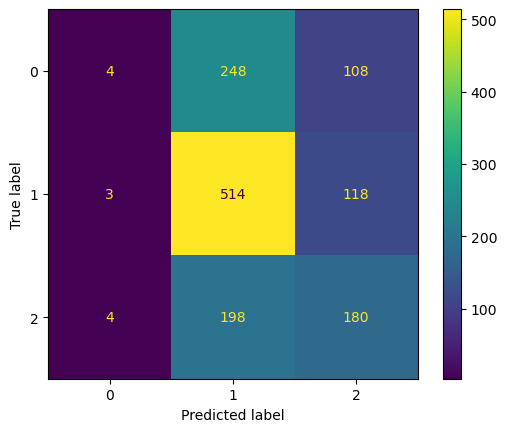

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_cl, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig("confusion_matrix.png", format="png", dpi=300)
plt.show()

In [206]:
## KNN classifier for categorical FTR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features_cl_dt = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl_dt, target_cl, random_state = 0)
# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

knn = KNeighborsClassifier(n_neighbors = 140)
knn.fit(X_train_cl_scaled, y_train_cl)
knn.score(X_test_cl_scaled, y_test_cl)

0.4989106753812636

In [208]:
## Decision Tree CL

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features_cl_dt = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl_dt, target_cl, random_state = 0)

# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train_cl_scaled, y_train_cl)

pred = tree.predict(X_test_cl)
print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.46114742193173563
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       360
           2       0.46      1.00      0.63       635
           3       0.00      0.00      0.00       382

    accuracy                           0.46      1377
   macro avg       0.15      0.33      0.21      1377
weighted avg       0.21      0.46      0.29      1377



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

In [149]:
# with Gridsearch cv
# takes very very long time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Step 1: Define features and target
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]

# Step 2: Train a preliminary model to get feature importances
preliminary_rf = RandomForestClassifier(random_state=42)
preliminary_rf.fit(features_cl, target_cl)

# Step 3: Filter features based on importance threshold
importance_threshold = 0.04
feature_importances = pd.DataFrame({
    'Feature': features_cl.columns,
    'Importance': preliminary_rf.feature_importances_
})
important_features = feature_importances[feature_importances['Importance'] > importance_threshold]['Feature']
features_important = features_cl[important_features]

# Step 4: Remove zero-variance columns from filtered features
features_important = features_important.loc[:, features_important.var() > 0]

# Step 5: Split and scale the filtered dataset
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_important, target_cl, random_state=42)

# Scaling based on filtered features only
scaler = MinMaxScaler()
X_train_cl_scaled = scaler.fit_transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

# Step 6: Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [500, 750, 1000, 1250],  # Include values around your optimal 1000
    'max_depth': [None, 10, 20, 30],         # Standard depth settings
    'min_samples_split': [2, 5, 10],         # Standard split settings
    'min_samples_leaf': [1, 2, 4]   
}

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Step 7: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Step 8: Fit GridSearchCV on the training data
grid_search.fit(X_train_cl_scaled, y_train_cl)

# Step 9: Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Step 10: Evaluate the best model on the test data
y_pred = best_rf_model.predict(X_test_cl_scaled)
accuracy = accuracy_score(y_test_cl, y_pred)
print("Best Parameters:", grid_search.best_params_)
print(f"Best Model Accuracy: {accuracy}")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test_cl, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cl, y_pred))

# Feature importance analysis for the final tuned model
final_feature_importances = pd.DataFrame({
    'Feature': important_features,  # Now using the selected important features only
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(final_feature_importances)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 750}
Best Model Accuracy: 0.47639796659404504

Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.05      0.09       339
           2       0.48      0.86      0.62       605
           3       0.46      0.28      0.35       433

    accuracy                           0.48      1377
   macro avg       0.44      0.40      0.35      1377
weighted avg       0.45      0.48      0.40      1377


Confusion Matrix:
[[ 17 261  61]
 [  8 519  78]
 [ 19 294 120]]

Feature Importances:
                         Feature  Importance
17  p_away_shots_conceded_last_6    0.160429
2      p_home_shots_taken_last_6    0.157097
3   p_home_shots_conceded_last_6    0.154840
16     p_away_shots_taken_last_6    0.153349
20     p_away_fouls_fouls_last_6    0.130598
6      p_home_fouls_fouls_last_6    0.126598
21    p_away_fouls_fouled_last_6    0.117089


In [222]:
#with RandomizedSearchCV Implementation

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Step 1: Define features and target
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]

# Step 2: Train a preliminary model to get feature importances
preliminary_rf = RandomForestClassifier(random_state=42)
preliminary_rf.fit(features_cl, target_cl)

# Step 3: Filter features based on importance threshold
importance_threshold = 0.1
feature_importances = pd.DataFrame({
    'Feature': features_cl.columns,
    'Importance': preliminary_rf.feature_importances_
})
important_features = feature_importances[feature_importances['Importance'] >= importance_threshold]['Feature']
features_important = features_cl[important_features]

# Step 4: Remove zero-variance columns
features_important = features_important.loc[:, features_important.var() > 0]

# Step 5: Split and scale the filtered dataset
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_important, target_cl, random_state=42)

# Scaling based on filtered features only
scaler = MinMaxScaler()
X_train_cl_scaled = scaler.fit_transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [750, 850, 1050],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForest model and RandomizedSearchCV
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,                    # Number of random combinations to try
    cv=5,                         # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,                    # Use all processors
    random_state=42               # For reproducibility
)

# Fit RandomizedSearchCV on the scaled training data
random_search.fit(X_train_cl_scaled, y_train_cl)

# Output the best parameters and the best cross-validation score
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best Cross-Validation Score from RandomizedSearchCV:", random_search.best_score_)

# Evaluation using the best model from RandomizedSearchCV
best_rf_model_random = random_search.best_estimator_
y_pred_random = best_rf_model_random.predict(X_test_cl_scaled)
print("\nRandomizedSearchCV Model Evaluation")
print("Accuracy:", accuracy_score(y_test_cl, y_pred_random))
print("Classification Report:\n", classification_report(y_test_cl, y_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_test_cl, y_pred_random))

print("\nFeature Importances:")
print(final_feature_importances)

ValueError: at least one array or dtype is required

In [ ]:
# save as pickle file for streamlit

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model_random, file)

In [155]:
# HalvingGridSearchCV
# also takes very long time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Step 1: Define features and target
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]

# Step 2: Train a preliminary model to get feature importances
preliminary_rf = RandomForestClassifier(random_state=42)
preliminary_rf.fit(features_cl, target_cl)

# Step 3: Filter features based on importance threshold
importance_threshold = 0.0  # Using 0 threshold as requested
feature_importances = pd.DataFrame({
    'Feature': features_cl.columns,
    'Importance': preliminary_rf.feature_importances_
})
important_features = feature_importances[feature_importances['Importance'] >= importance_threshold]['Feature']
features_important = features_cl[important_features]

# Step 4: Remove zero-variance columns
features_important = features_important.loc[:, features_important.var() > 0]

# Step 5: Split and scale the filtered dataset
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_important, target_cl, random_state=42)

# Scaling based on filtered features only
scaler = MinMaxScaler()
X_train_cl_scaled = scaler.fit_transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

# Define parameter grid for HalvingGridSearchCV
param_grid = {
    'n_estimators': [500, 750, 1000, 1250],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForest model and HalvingGridSearchCV
rf_model = RandomForestClassifier(random_state=42)
halving_search = HalvingGridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    factor=2,                     # Each iteration reduces the number of candidates by half
    scoring='accuracy',
    cv=5,                         # 5-fold cross-validation
    n_jobs=-1                     # Use all processors
)

# Fit HalvingGridSearchCV on the scaled training data
halving_search.fit(X_train_cl_scaled, y_train_cl)

# Output the best parameters and the best cross-validation score
print("Best Parameters from HalvingGridSearchCV:", halving_search.best_params_)
print("Best Cross-Validation Score from HalvingGridSearchCV:", halving_search.best_score_)

# Evaluation using the best model from HalvingGridSearchCV
best_rf_model_halving = halving_search.best_estimator_
y_pred_halving = best_rf_model_halving.predict(X_test_cl_scaled)
print("\nHalvingGridSearchCV Model Evaluation")
print("Accuracy:", accuracy_score(y_test_cl, y_pred_halving))
print("Classification Report:\n", classification_report(y_test_cl, y_pred_halving))
print("Confusion Matrix:\n", confusion_matrix(y_test_cl, y_pred_halving))

KeyboardInterrupt: 